# 决策树与分类算法

In [2]:
from sklearn import datasets
from sklearn import tree
from six import StringIO
import pydot
import os

In [3]:
os.environ['PATH'] = os.environ['PATH'] + (';F:/JupyterNotebook/machineLearning/tools/Graphviz-2.47.0/bin')

In [4]:
iris = datasets.load_iris() # 加载Iris数据集
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [5]:
dot_data = StringIO()  
tree.export_graphviz(clf, 
                     out_file=dot_data,
                     feature_names=iris.feature_names, 
                     class_names=iris.target_names, 
                     filled=True, 
                     rounded=True, 
                     special_characters=True)  

In [6]:
tree.export_graphviz(clf, out_file=r"output/tree.dot") # 生成决策树的文件
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('output/iris.png')

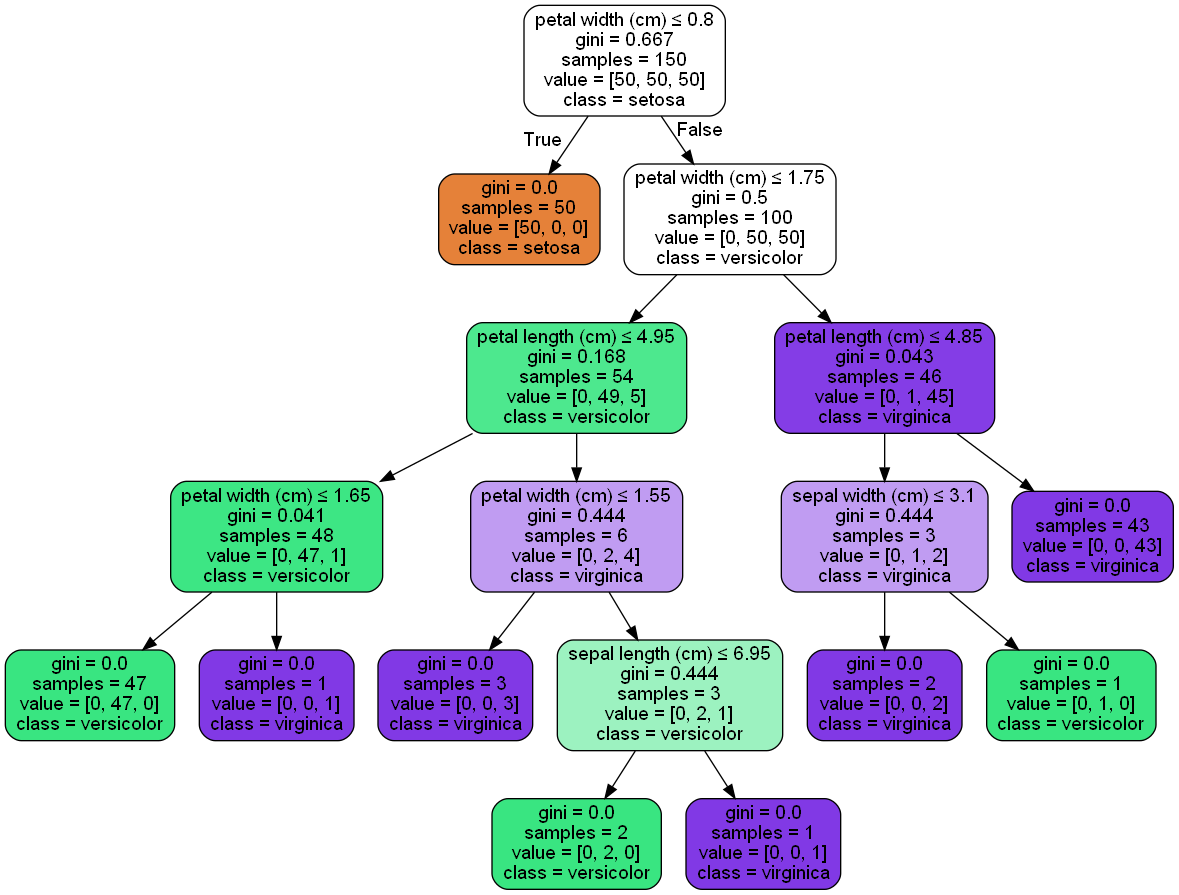

# 聚类分析

# 文本分析

## 文本特征提取及表示

### TF-IDF

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# 输入数据
corpus = ['This is the first document.','This is the second document.','And the third one','Is this the first document',]

In [6]:
# 文本矩阵
vectorizer = TfidfVectorizer(min_df = 1)
cret = vectorizer.fit_transform(corpus)

In [7]:
print(cret)

  (0, 1)	0.4387767428592343
  (0, 2)	0.5419765697264572
  (0, 6)	0.35872873824808993
  (0, 3)	0.4387767428592343
  (0, 8)	0.4387767428592343
  (1, 5)	0.6331460890591821
  (1, 1)	0.4041289471327509
  (1, 6)	0.3304018949358262
  (1, 3)	0.4041289471327509
  (1, 8)	0.4041289471327509
  (2, 4)	0.5528053199908667
  (2, 7)	0.5528053199908667
  (2, 0)	0.5528053199908667
  (2, 6)	0.2884767487500274
  (3, 1)	0.4387767428592343
  (3, 2)	0.5419765697264572
  (3, 6)	0.35872873824808993
  (3, 3)	0.4387767428592343
  (3, 8)	0.4387767428592343


In [8]:
# 特征词
fnames = vectorizer.get_feature_names()

In [9]:
print(fnames)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


### 信息增益

### 互信息

### 卡方统计

In [ ]:
from gensim.models.word2vec import LineSentence

### 词嵌入

In [8]:
import numpy as np
from nltk.tokenize import WordPunctTokenizer
from gensim.models import Word2Vec

In [2]:
# 输入数据
data = list(open(r"data/quora.txt","r",encoding = 'utf-8'))

In [3]:
data[50]

"What TV shows or books help you read people's body language?\n"

In [6]:
# 分词
tokenizer = WordPunctTokenizer()
data_tok = [tokenizer.tokenize(lines.lower()) for lines in data] # 列表解析，完成分词

In [7]:
data_tok[50]

['what',
 'tv',
 'shows',
 'or',
 'books',
 'help',
 'you',
 'read',
 'people',
 "'",
 's',
 'body',
 'language',
 '?']

In [ ]:
model = Word2Vec(data_tok,size)

In [10]:
# 使用Word2Vec对词进行向量化
model = Word2Vec(data_tok,
                 vector_size=32,  # 设置结果词向量的长度，长度越高保留的信息越多。size足够大的情况，甚至一词多义也是可以解决的
                 min_count=5,  # 去除低频词汇
                 window=5).wv  # 定义窗口大小，也就是上下文的范围 5是一个不错的数字

In [13]:
# 显示和good的词向
model.get_vector('good') # 获取当前词的词向量，如果词未出现会报错

array([ 1.1801168 ,  1.6470226 , -1.232785  ,  0.56222785, -0.34279913,
       -1.1874585 , -3.7981462 , -0.46242574, -0.5275445 , -2.3404365 ,
       -3.208892  , -4.211491  ,  0.9649461 ,  2.6199355 ,  1.1809467 ,
        1.016221  , -1.7164228 ,  1.1658814 ,  1.02947   ,  2.6358218 ,
       -4.712438  ,  2.9715564 , -0.23788884, -0.445643  , -0.9279799 ,
        4.5521607 , -1.299245  ,  1.3637797 , -5.0526547 ,  0.22710708,
       -2.2018795 , -1.7110524 ], dtype=float32)

In [14]:
# 显示和bread相似的词
print(model.most_similar('bread'))

[('rice', 0.9689880013465881), ('cheese', 0.9387412071228027), ('sauce', 0.9302645921707153), ('cream', 0.9207928776741028), ('beans', 0.9167976379394531), ('butter', 0.9154883623123169), ('fruit', 0.9138880968093872), ('potato', 0.9132397770881653), ('flour', 0.9103957414627075), ('vodka', 0.9077138900756836)]


In [15]:
def get_phrase_embedding(phrase):
    token = tokenizer.tokenize(phrase.lower())  # 第一步分词
    veclist = []
    for word in token:  # 第二步，获取每个词的词向量，请注意获取不到的词跳过
        try:
            veclist.append(model.get_vector(word))
        except:
            pass
    if len(veclist) != 0:  # 第三步词向量求平均
        vector = np.array(veclist).mean(axis=0)
    else:
        vector = np.zeros([model.vector_size], dtype='float32')  # 如果这句话每个词都没见过返回0向量
    return vector

In [16]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

In [17]:
vector

array([-0.28199327,  1.184057  ,  0.9979459 ,  0.9691355 ,  0.19447829,
       -0.660113  , -1.610508  , -2.8294444 ,  0.79751503, -0.27100456,
       -0.6577877 , -0.41419947,  0.33903754,  0.68928754,  1.3103867 ,
       -2.2361941 , -1.2388358 , -1.0542259 , -0.45921448, -2.3730025 ,
       -1.0869958 , -0.35880584, -1.4305936 ,  0.3681746 , -0.49202693,
       -0.7793191 , -0.12794116,  0.56976134, -2.1432066 ,  1.4825181 ,
        0.77084345,  0.5631542 ], dtype=float32)

In [18]:
data_vectors = np.array([get_phrase_embedding(l) for l in data])

In [19]:
# 找相似句子
def find_nearest(query, k=10):  
    wordvec = np.array(get_phrase_embedding(query))  # 计算当前句子的句向量
    coslist = [np.dot(wordvec, v) / (np.linalg.norm(wordvec) * (np.linalg.norm(v))) for v in
               data_vectors]  # 计算每个句子与现有文本集中句子的相似度
    coslist = sorted(list(enumerate(coslist)), key=lambda vec: vec[1], reverse=True)  # 排序
    results = [data[i[0]] for i in coslist[:k]]  # 找出前k个句子的index
    return results

In [20]:
find_nearest(query="How does Trump?", k=10)

<ipython-input-19-72b832e8ddba>:4: RuntimeWarning: invalid value encountered in float_scalars
  coslist = [np.dot(wordvec, v) / (np.linalg.norm(wordvec) * (np.linalg.norm(v))) for v in


['How does Donald Trump persuade?\n',
 'How does Trump election relate to Mexican peso value?\n',
 'Does trump do to church?\n',
 'Why does Trump tweet?\n',
 'How can Paul Ryan endorse Trump?\n',
 'How does Hillary Clinton plan to tackle campaign finance reform?\n',
 'How does Donald Trump treat waitstaff?\n',
 'How did Clinton call Trump?\n',
 'Does Donald Trump do coke?\n',
 'How did Mark Zuckerberg propose to Priscilla Chan?\n']

### 语言模型

### 向量空间模型

## 知识图谱

## 词法分析

## 句法分析

In [22]:
from stanfordcorenlp import StanfordCoreNLP

In [26]:
model_path = 'F:\JupyterNotebook\Lib\stanford-corenlp-4.2.0'

In [28]:
nlp = StanfordCoreNLP(model_path,lang='zh',memory='8g')

In [29]:
sentence = '一只小猫抓老鼠'

In [39]:
# 中文分词
nlp.word_tokenize(sentence)

['一', '只', '小', '猫', '抓', '老鼠']

In [38]:
# 词性标注
pos_tag = nlp.pos_tag(sentence)
print(pos_tag)

[('一', 'CD'), ('只', 'M'), ('小', 'JJ'), ('猫', 'NN'), ('抓', 'VV'), ('老鼠', 'NN')]


In [37]:
# 解析语法
parse_result = nlp.parse(sentence)
print(parse_result)

(ROOT
  (IP
    (NP
      (QP (CD 一)
        (CLP (M 只)))
      (ADJP (JJ 小))
      (NP (NN 猫)))
    (VP (VV 抓)
      (NP (NN 老鼠)))))


In [40]:
# 解析语法关系
dep = nlp.dependency_parse(sentence)
print(dep)

[('ROOT', 0, 5), ('nummod', 4, 1), ('mark:clf', 1, 2), ('amod', 4, 3), ('nsubj', 5, 4), ('dobj', 5, 6)]


In [41]:
# 名命实体分析
nlp.ner(sentence)

[('一', 'NUMBER'), ('只', 'O'), ('小', 'O'), ('猫', 'O'), ('抓', 'O'), ('老鼠', 'O')]

In [42]:
import jieba

In [44]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True) #全模式
print("Full Mode:" + "/".join(seg_list))

Full Mode:我/来到/北京/清华/清华大学/华大/大学


In [45]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False) #精确模式
print("Default Mode:" + "/".join(seg_list))

Default Mode:我/来到/北京/清华大学


In [46]:
seg_list = jieba.cut("他来到了网易杭研大厦", HMM=False) #不使用HMM模型
print("/".join(seg_list))

他/来到/了/网易/杭/研/大厦


In [47]:
seg_list = jieba.cut("他来到了网易杭研大厦", HMM=True) #使用HMM模型
print("/".join(seg_list))

他/来到/了/网易/杭研/大厦


In [48]:
seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造", HMM=False) #搜索引擎模式
print("/".join(seg_list))

小/明/硕士/毕业/于/中国/科学/学院/科学院/中国科学院/计算/计算所/，/后/在/日本/京都/大学/日本京都大学/深造


In [49]:
seg_list = jieba.lcut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造", HMM=True)
print(seg_list)

['小明', '硕士', '毕业', '于', '中国', '科学', '学院', '科学院', '中国科学院', '计算', '计算所', '，', '后', '在', '日本', '京都', '大学', '日本京都大学', '深造']


### 依存结构句法分析

### 短语结构句法分析

## 语义分析

## 文本分析应用

### 文本分类

### 信息抽取

### 问答系统

### 情感分析

In [8]:
from snownlp import SnowNLP

In [144]:
s = "可能是寂寞，空气变得很稀薄，满城霓虹开出荒漠。还为你等着，我的心快要死了，要有什么刺激我魂魄。太深，太多，爱会走火入魔，任由你，自由的，耗在我苦中作乐。这城市那么空，这回忆那么凶，这街道车水马龙，我能和谁相拥。这眉头那么重，这思念那么浓，Alone，这感觉我跟从。还为你等着，我的心快要死了，要有什么刺激我魂魄。太深，太多，爱会走火入魔，任由你，自由的，耗在我苦中作乐。这城市那么空。这回忆那么凶，这街道车水马龙，我能和谁相拥。这眉头那么重。这思念那么浓，Alone，这感觉我跟从。这城市那么空，这胸口那么痛，这人海风起云涌，能不能再相逢。这快乐都雷同，这悲伤千万种，Alone，这个我谁能懂。这城市那么空，没有你的空洞，连呼吸带出的风，响得震耳欲聋。我站在黑暗中，心已经跳不动，Alone，再爱也没有用"

In [6]:
s = "明天可能会下雪"

In [9]:
sentence = SnowNLP(s)

In [10]:
print(sentence.words)

['明天', '可能', '会', '下雪']


In [147]:
sentence.sentiments

0.9999999999999771

# 神经网络

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import mnist_forward
import os

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

## 定义网络模型，神经网络的前向传播(mnist_forward.py)

这里定义了网络模型输入输出节点的个数、隐藏层节点数、同时定义get_weigt()函数实现对参数w的设置，包括参数的形状和是否正则化的标志，从输入层到隐藏层的参数w1形状为[784,500],由隐藏层到输出层的参数w2形状为[500,10]。定义get_bias()实现对偏置b的设置。由输入层到隐藏层的偏置b1形状长度为500的一维数组，由隐藏层到输出层的偏置b2形状长度为10的一维数组，初始化值为全0

In [3]:
INPUT_NODE=784   # 输入节点
OUTPUT_NODE=10   # 输出节点
LAYER1_NODE=500   # 隐藏节点
 
def get_weight(shape,regularizer):
    w=tf.Variable(tf.truncated_normal(shape,stddev=0.1))
    if regularizer !=None:
        tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w
 
def get_bias(shape):
    b=tf.Variable(tf.zeros(shape))
    return b
 
def forward(x,regularizer):
    w1=get_weight([INPUT_NODE,LAYER1_NODE],regularizer)
    b1=get_bias(LAYER1_NODE)
    y1=tf.nn.relu(tf.matmul(x,w1)+b1)
 
    w2=get_weight([LAYER1_NODE,OUTPUT_NODE],regularizer)
    b2=get_bias([OUTPUT_NODE])
    y=tf.matmul(y1,w2)+b2
    return y

## 神经网络的反向传播(mnist_backward.py)

In [ ]:
利用训练数据集对神经网络进行训练，通过降低损失函数值，实现网络模型参数的优化，
从而得到准确率高且泛化能力强的神经网络模型。

In [ ]:

 
batch_size=200
learning_rate_base=0.1    # 初始学习率
learning_rate_decay=0.99    # 学习率衰减率
regularizer=0.0001    # 正则化系数
steps=50000     # 训练轮数
moving_average_decay=0.99
model_save_path="./model/"  # 模型保存路径
model_name="mnist_model"
 
def backward(mnist):
    x=tf.placeholder(tf.float32,[None,mnist_forward.INPUT_NODE])
    y_=tf.placeholder(tf.float32,[None,mnist_forward.OUTPUT_NODE])
    y=mnist_forward.forward(x,regularizer)  # 调用forward()函数，设置正则化，计算y
    global_step=tf.Variable(0,trainable=False)   # 当前轮数计数器设定为不可训练类型
 
    # 调用包含所有参数正则化损失的损失函数loss
    ce=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y,labels=tf.argmax(y_,1))
    cem=tf.reduce_mean(ce)
    loss=cem+tf.add_n(tf.get_collection('losses'))
 
    # 设定指数衰减学习率learning_rate
    learning_rate=tf.train.exponential_decay(
        learning_rate_base,
        global_step,
        mnist.train.num_examples/batch_size,
        learning_rate_decay,
        staircase=True
    )
    # 梯度衰减对模型优化，降低损失函数
    train_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)
 
    # 定义参数的滑动平均
    ema=tf.train.ExponentialMovingAverage(moving_average_decay,global_step)
    ema_op=ema.apply(tf.trainable_variables())
    with tf.control_dependencies([train_step,ema_op]):
        train_op=tf.no_op(name='train')
 
    saver=tf.train.Saver()
 
    with tf.Session() as sess:
        init_op=tf.global_variables_initializer()   # 所有参数初始化
        sess.run(init_op)
 
        ckpt = tf.train.get_checkpoint_state(model_save_path)  # 加载指定路径下的滑动平均
        if ckpt and ckpt.model_checkpoint_path:
            saver.restore(sess, ckpt.model_checkpoint_path)
 
        for i in range(steps):   # 循环迭代steps轮
            xs,ys=mnist.train.next_batch(batch_size)
            _,loss_value,step=sess.run([train_op,loss,global_step],feed_dict={x:xs,y_:ys})
            if i %1000==0:
                print("After %d training step(s),loss on training batch is %g."%(step,loss_value))
                saver.save(sess,os.path.join(model_save_path,model_name),global_step=global_step)   # 当前会话加载到指定路径
 
 
if __name__=='__main__':
    mnist = input_data.read_data_sets("./data/", one_hot=True)
    backward(mnist)

# 贝叶斯网络

# 支持向量机

# 进化计算

# 分布式机器学习

# 深度学习

# 高级深度学习

# 推荐系统